In [1]:
#import pyspark

In [2]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [3]:
sc = SparkContext()

In [4]:
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [5]:
socket_stream = ssc.socketTextStream("127.0.0.1", 9994) #Need to match with ip and port no mentioned in ReadTweetTags.py
#Better to change the port no in both the script for every rerun

In [6]:
lines = socket_stream.window(20)

In [7]:
from collections import namedtuple

In [8]:
fields=("tag","count")

In [9]:
Tweet = namedtuple('Tweet', fields)

In [10]:
( lines.flatMap( lambda text: text.split(" ")) 
.filter( lambda word: word.lower().startswith("#") )
.map( lambda word: (word.lower(), 1))
.reduceByKey( lambda a,b: a+b )
.map( lambda rec: Tweet( rec[0], rec[1]) )
.foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) 
.limit(10).registerTempTable("tweets") ) )

Now Run ReadTweetTags

In [11]:
ssc.start()

In [12]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline #only works in Notebook
sns.set()

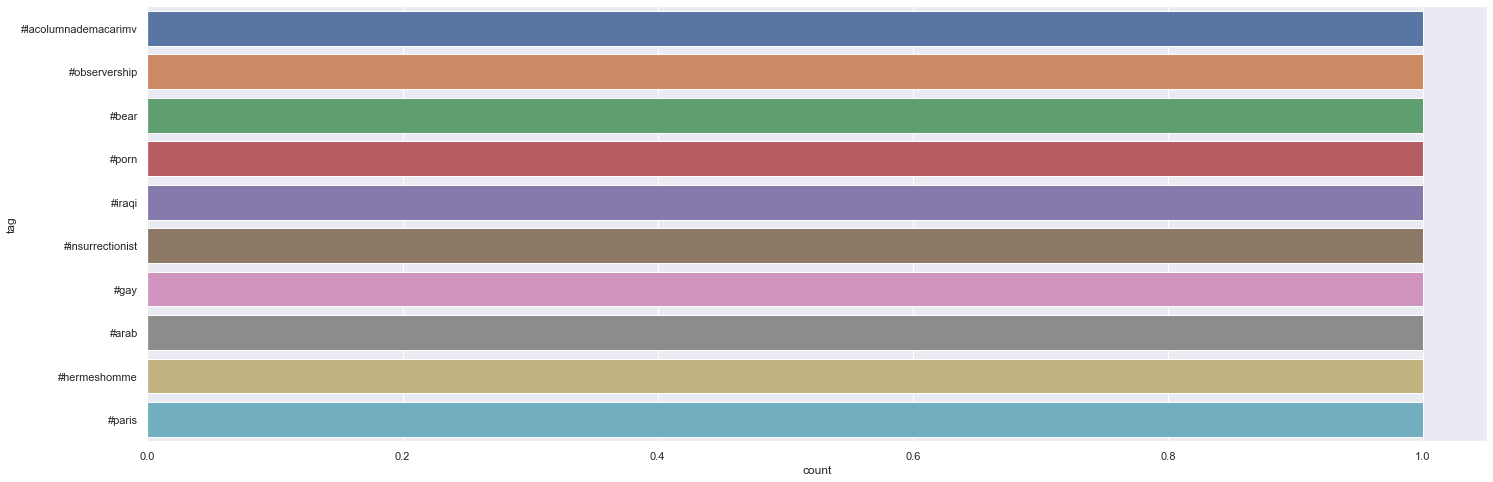

In [30]:
count=0
while count<10 :
	time.sleep(3)
	top10_tweets=sqlContext.sql('select tag,count from tweets')
	top10_df=top10_tweets.toPandas()
	display.clear_output(wait=True)
	plt.figure(figsize = (24,8))
	sns.barplot(x="count", y="tag", data=top10_df)
	plt.show()
	count +=1

In [26]:
top10_tweets=sqlContext.sql('select tag,count from tweets')
top10_df=top10_tweets.toPandas()

In [27]:
top10_df

,tag,count
0,#clip!,1
1,#bondage,1
2,#ballgagged,1
3,#thursdaymorning,1
4,#did,1
5,#naked,1
6,#berniesanders,1
7,#thursdaythoughts,1
8,#tedcruzisaseditionist,1


In [31]:
ssc.stop()